In [1]:
# dane i biblioteki
import numpy as np
import matplotlib.pyplot as plt

nx = 251
ny = 81
a = 100
b = 40
dz = 0.01
Q = -1.0
mu = 1.0
rho = 1.0
y1 = -40 * dz
y2 = 40 * dz
eps = 1e-7  # dokładność zbieżności


 Zbieżność w iteracji 4156.


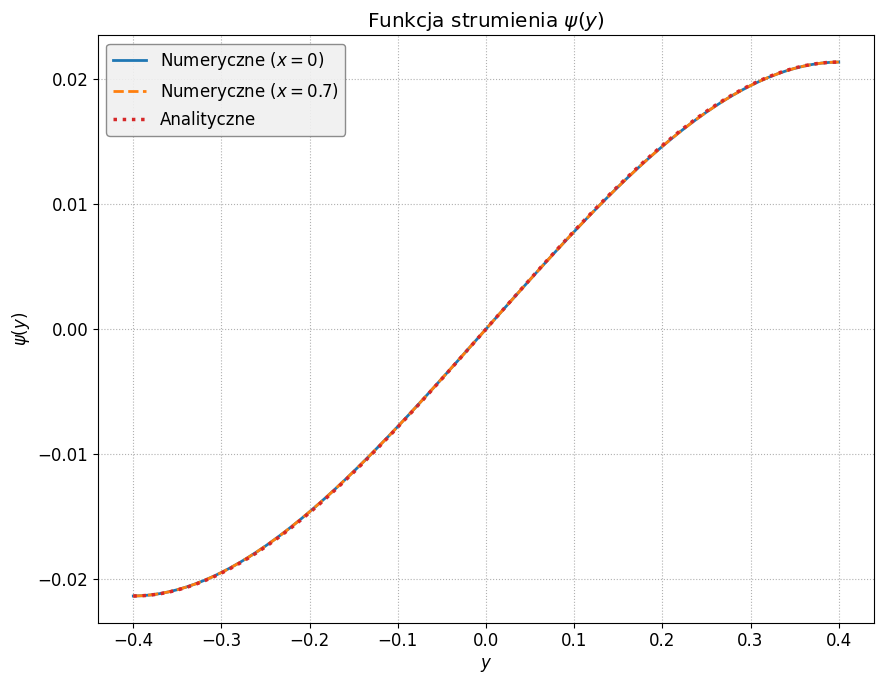

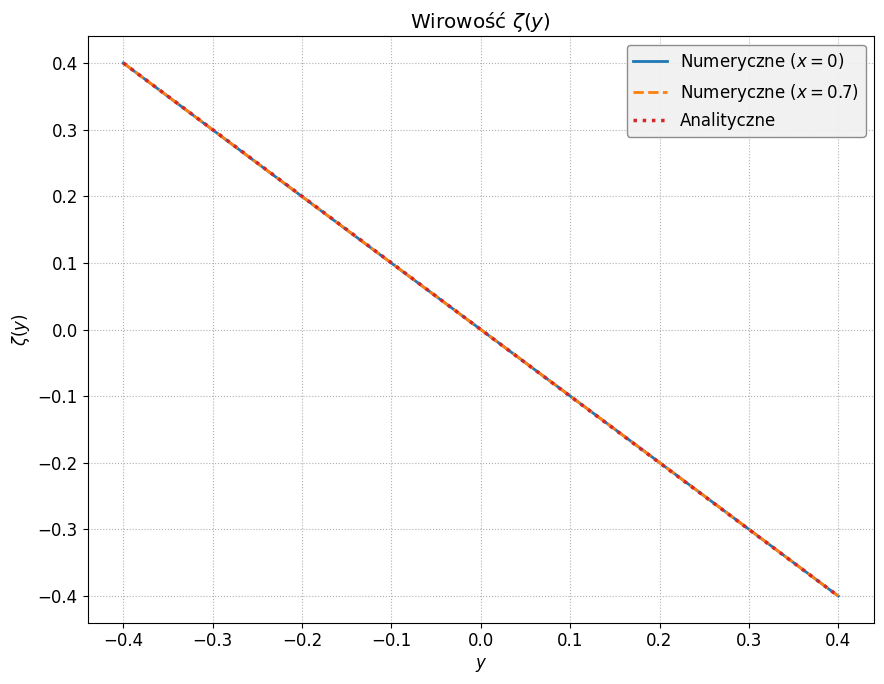

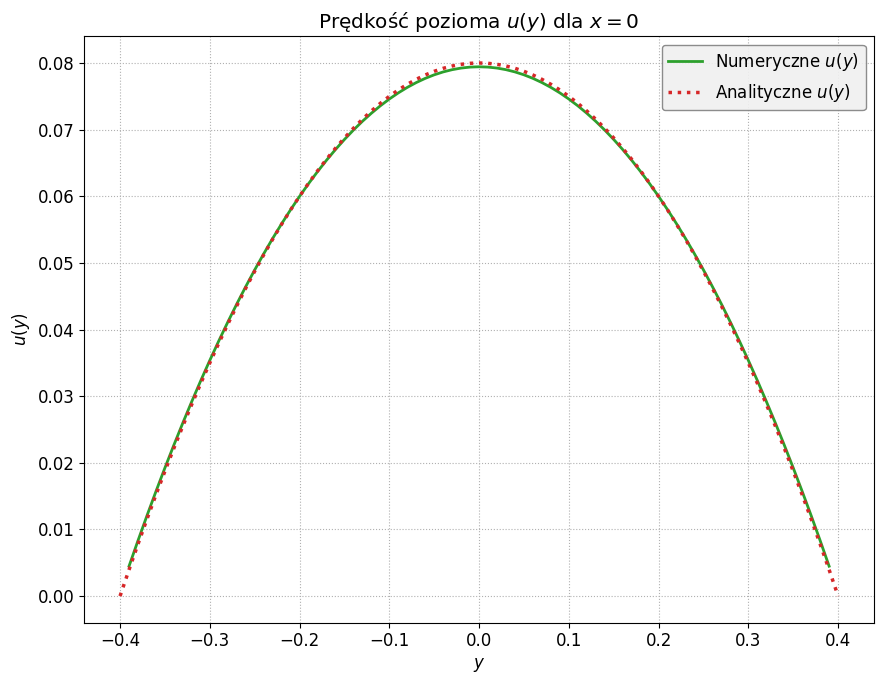

In [2]:

psi = np.zeros((nx, ny))
dze = np.zeros((nx, ny))

def psi_analytic(y):
    return (Q / (2 * mu)) * (y**3 / 3 + y1 * y2 * y)

def dze_analytic(y):
    return (Q / mu) * y

# Definicja warunków brzegowych
y_vec = (np.arange(ny) - b) * dz
psi_boundary = psi_analytic(y_vec)
dze_boundary = dze_analytic(y_vec)
psi[0, :], psi[-1, :] = psi_boundary, psi_boundary
dze[0, :], dze[-1, :] = dze_boundary, dze_boundary
psi[:, 0], psi[:, -1] = psi_boundary[0], psi_boundary[-1]
dze[:, 0], dze[:, -1] = dze_boundary[0], dze_boundary[-1]

check_i = 50 + a
check_j = 20 + b

max_iter = 100000
min_iter = 500

for iteration in range(max_iter):
    psi_prev = psi[check_i, check_j]

    psi_new = psi.copy()
    dze_new = dze.copy()

    psi_new[1:-1, 1:-1] = 0.25 * (
        psi[2:, 1:-1] + psi[:-2, 1:-1] +
        psi[1:-1, 2:] + psi[1:-1, :-2] -
        dze[1:-1, 1:-1] * dz**2
    )
    dze_new[1:-1, 1:-1] = 0.25 * (
        dze[2:, 1:-1] + dze[:-2, 1:-1] +
        dze[1:-1, 2:] + dze[1:-1, :-2]
    )

    psi = psi_new
    dze = dze_new

    if iteration > min_iter:
        delta = abs(psi[check_i, check_j] - psi_prev)
        if delta < eps:
            print(f"\n Zbieżność w iteracji {iteration}.")
            break
else:
    print(f"\n Max iter.")

y_vals = (np.arange(ny) - b) * dz
ix_0 = 0 + a
ix_07 = 70 + a

psi_0 = psi[ix_0, :]
dze_0 = dze[ix_0, :]
psi_07 = psi[ix_07, :]
dze_07 = dze[ix_07, :]
psi_exact = psi_analytic(y_vals)
dze_exact = dze_analytic(y_vals)

# Wykresy
plt.rcParams.update({
    'lines.linewidth': 2,
    'font.size': 12,
    'legend.framealpha': 0.9,
    'legend.facecolor': '#f0f0f0',
    'legend.edgecolor': 'gray'
})

# Funkcja strumienia
plt.figure(figsize=(9, 7))
plt.plot(y_vals, psi_0, color='C0', linestyle='-', label='Numeryczne ($x=0$)')
plt.plot(y_vals, psi_07, color='C1', linestyle='--', label='Numeryczne ($x=0.7$)')
plt.plot(y_vals, psi_exact, color='C3', linestyle=':', linewidth=2.5, label='Analityczne')
plt.title('Funkcja strumienia $\psi(y)$')
plt.xlabel('$y$')
plt.ylabel('$\psi(y)$')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.legend(loc='best')
plt.tight_layout()

# Wirowość
plt.figure(figsize=(9, 7))
plt.plot(y_vals, dze_0, color='C0', linestyle='-', label='Numeryczne ($x=0$)')
plt.plot(y_vals, dze_07, color='C1', linestyle='--', label='Numeryczne ($x=0.7$)')
plt.plot(y_vals, dze_exact, color='C3', linestyle=':', linewidth=2.5, label='Analityczne')
plt.title('Wirowość $\zeta(y)$')
plt.xlabel('$y$')
plt.ylabel('$\zeta(y)$')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.legend(loc='best')
plt.tight_layout()

# Prędkość pozioma
u_num = (psi[ix_0, 2:] - psi[ix_0, :-2]) / (2 * dz)
u_exact = (Q / (2 * mu)) * (y_vals**2 - y2**2)

plt.figure(figsize=(9, 7))
plt.plot(y_vals[1:-1], u_num, color='C2', linestyle='-', label='Numeryczne $u(y)$')
plt.plot(y_vals, u_exact, color='C3', linestyle=':', linewidth=2.5, label='Analityczne $u(y)$')
plt.title('Prędkość pozioma $u(y)$ dla $x=0$')
plt.xlabel('$y$')
plt.ylabel('$u(y)$')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.legend(loc='best')
plt.tight_layout()

plt.show()
